This script will generate dR/R matrix from VDaq '.blk' file stacks.   
Most functions are packed, you just need to change path folder.

In [2]:
import Common_Functions as cf
from OI_Functions.Map_Subtractor import Sub_Map_Generator
from OI_Functions.VDaQ_dRR_Generator import BLK2DRR
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import cv2
import pandas as pd

wp = r'D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\Run01_G8'

# show blk file names on example folder.
cf.Get_File_Name(wp,'.BLK')


['D:\\ZR\\_Data_Temp\\VDaQ_Data\\200910_L80_LM_OI\\Run01_G8\\G8_E00B000.BLK',
 'D:\\ZR\\_Data_Temp\\VDaQ_Data\\200910_L80_LM_OI\\Run01_G8\\G8_E00B001.BLK',
 'D:\\ZR\\_Data_Temp\\VDaQ_Data\\200910_L80_LM_OI\\Run01_G8\\G8_E00B002.BLK',
 'D:\\ZR\\_Data_Temp\\VDaQ_Data\\200910_L80_LM_OI\\Run01_G8\\G8_E00B003.BLK',
 'D:\\ZR\\_Data_Temp\\VDaQ_Data\\200910_L80_LM_OI\\Run01_G8\\G8_E00B004.BLK',
 'D:\\ZR\\_Data_Temp\\VDaQ_Data\\200910_L80_LM_OI\\Run01_G8\\G8_E00B005.BLK',
 'D:\\ZR\\_Data_Temp\\VDaQ_Data\\200910_L80_LM_OI\\Run01_G8\\G8_E00B006.BLK',
 'D:\\ZR\\_Data_Temp\\VDaQ_Data\\200910_L80_LM_OI\\Run01_G8\\G8_E00B007.BLK',
 'D:\\ZR\\_Data_Temp\\VDaQ_Data\\200910_L80_LM_OI\\Run01_G8\\G8_E00B008.BLK',
 'D:\\ZR\\_Data_Temp\\VDaQ_Data\\200910_L80_LM_OI\\Run01_G8\\G8_E00B009.BLK',
 'D:\\ZR\\_Data_Temp\\VDaQ_Data\\200910_L80_LM_OI\\Run01_G8\\G8_E00B010.BLK']

---    
Read BLK and save dRR in a single file.    
Just need 1 line command.

In [3]:
reader = BLK2DRR(wp)
reader.Read_All_Frames()
reader.dR_R_Calculator(base_frame=[0,1],save=True)


In this example, dRR file saved at "D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\Run01_G8\Processed\dRR_Dictionaries.pkl"
It's an dictionary file, each key is the given id's all response.   
For Daq system, the last id is blank(ID 9 for G8),-1 is isi(reserved for ois system, will be null for daq.)

In [8]:
drr = cf.Load_Variable(r'D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\Run01_G8\Processed\dRR_Dictionaries.pkl')
print(f'All condition IDs: {list(drr.keys())}')
print(f'Drr file in shape (N_blk,N_frame,N_height,N_width):{drr[1].shape}')


All condition IDs: [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Drr file in shape (N_blk,N_frame,N_height,N_width):(11, 16, 540, 654)


It's easy to get response curve and average graph.

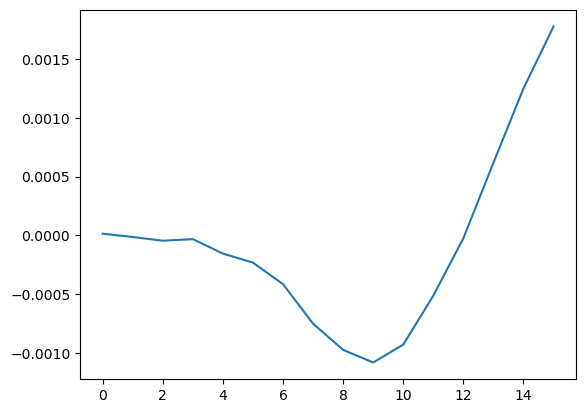

In [11]:
# OI response curve
plt.plot(drr[4].mean(-1).mean(-1).mean(0))

<AxesSubplot: >

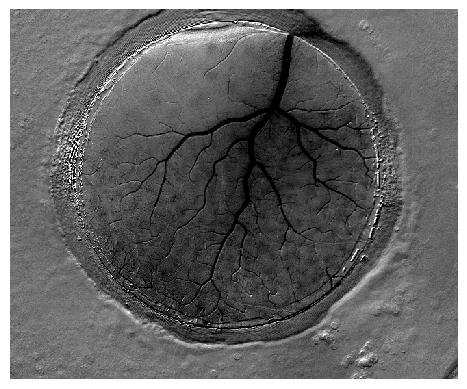

In [17]:
# average frame
img = drr[4].mean(0)[7:11].mean(0)
sns.heatmap(img,center = 0,square = True,xticklabels=False,yticklabels=False,cbar=False,cmap = 'gray',vmax = 0.003,vmin = -0.003)